In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
!pwd

/c/Users/Bharath/anaconda3/envs/SG_Land_Reclamation_analysis


In [3]:
os.chdir('Generated DataFrames/')

In [4]:
!ls

SG_land_area_data.csv
SG_population_data.csv


#### Loading DataFrames

In [5]:
SG_land_area = pd.read_csv('SG_land_area_data.csv')

In [6]:
SG_population = pd.read_csv('SG_population_data.csv')

In [7]:
SG_land_area.head(10)

,year,total_land_area
0,1960,581.5
1,1961,581.5
2,1962,581.5
3,1963,581.5
4,1964,581.5
5,1965,581.5
6,1966,581.5
7,1967,583.0
8,1968,584.3
9,1969,585.3


In [8]:
SG_population.head(10)

,Year,Population
0,1960,1646400.0
1,1961,1702400.0
2,1962,1750200.0
3,1963,1795000.0
4,1964,1841600.0
5,1965,1886900.0
6,1966,1934400.0
7,1967,1977600.0
8,1968,2012000.0
9,1969,2042500.0


In [9]:
SG_past = {}
SG_past['year'] = list(np.arange(1960, 2020))
SG_past['Population'] = SG_population['Population']
SG_past['Land Area'] = SG_land_area['total_land_area'][:-1]


In [10]:
SG_past = pd.DataFrame(SG_past)

In [11]:
SG_past['Population Density'] = SG_past['Population']/SG_past['Land Area']

In [12]:
SG_past

,year,Population,Land Area,Population Density
0,1960,1646400.0,581.500000,2831.298366
1,1961,1702400.0,581.500000,2927.601032
2,1962,1750200.0,581.500000,3009.802236
3,1963,1795000.0,581.500000,3086.844368
4,1964,1841600.0,581.500000,3166.981943
5,1965,1886900.0,581.500000,3244.883921
6,1966,1934400.0,581.500000,3326.569218
7,1967,1977600.0,583.000000,3392.109777
8,1968,2012000.0,584.300000,3443.436591
9,1969,2042500.0,585.300000,3489.663420


In [13]:
plt.rcParams.update({'font.size': 22})

Text(0, 0.5, 'Population Density')

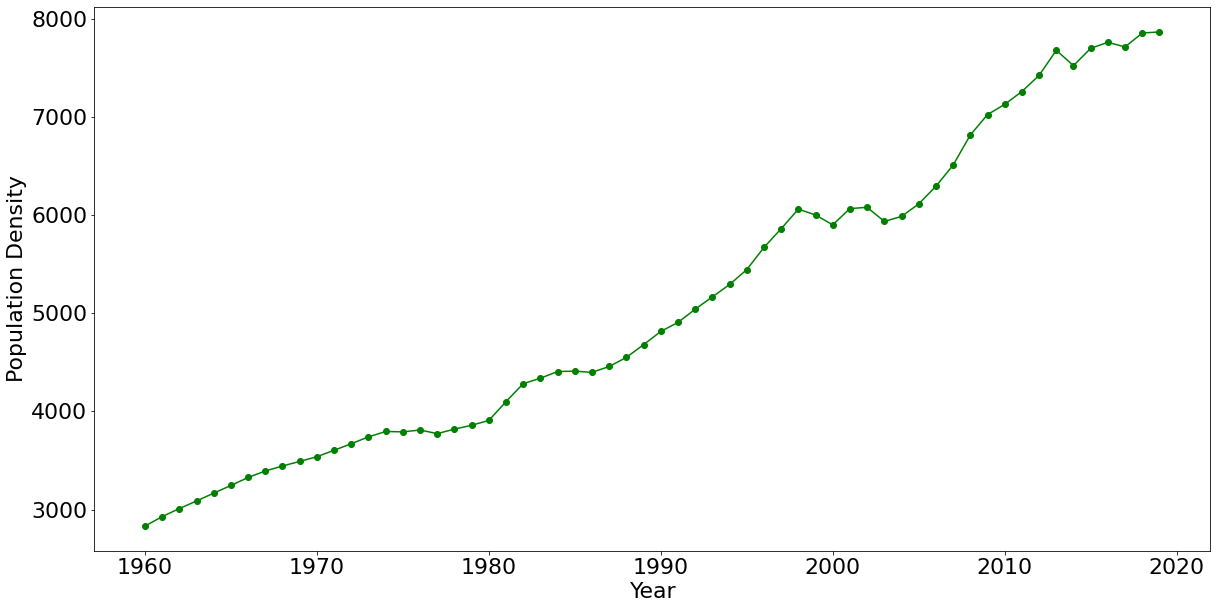

In [14]:
plt.figure(figsize = (20,10))
plt.plot(SG_past['year'], SG_past['Population Density'], 'o-g')
plt.xlabel('Year')
plt.ylabel('Population Density')

### Predicting the future of SG

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline



#### Land Area 

In [16]:
X = SG_land_area['year']
x = X.values
x = x.reshape(-1,1)

y = SG_land_area['total_land_area']

Score:  0.0
Score:  0.9593725505242343
Score:  0.9724228850966321
Score:  0.9798703969462305


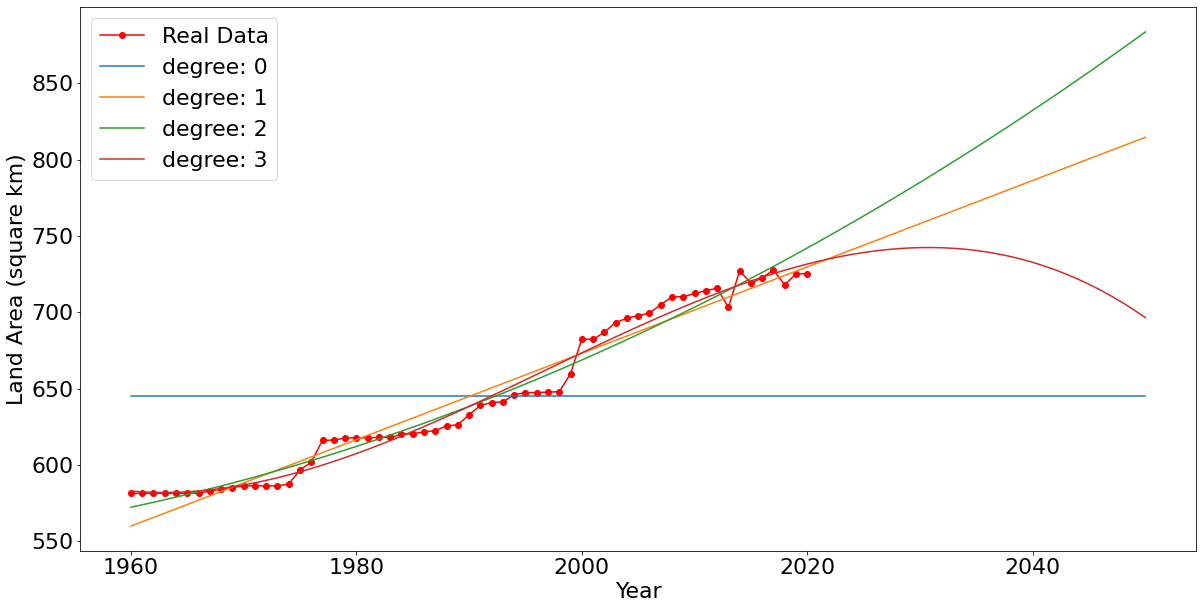

In [17]:
polyreg1 = {}
pred1 = {}
x_years = np.array(range(1960, 2051))
x_years = x_years.reshape(-1,1)

plt.figure(figsize = (20,10))
plt.plot(x,y, '-or', label = "Real Data")
plt.xlabel('Year')
plt.ylabel('Land Area (square km)')
plt.legend()

for i in range(4):
    degree = i
    polyreg1[i]=make_pipeline(PolynomialFeatures(degree),LinearRegression())
    polyreg1[i].fit(x,y)
    pred1[i] = polyreg1[i].predict(x_years)
    
    
    plt.plot(x_years, pred1[i], label = "degree: "+ str(i))
    plt.legend()
    
    print("Score: ", polyreg1[i].score(x,y))
    
    

In [18]:
# Degree 1 polynomial seems to be the best model for future predictions
# This decision was based on intuition as performance on a test set (sampled from years 1960 to 2020) is not a good metric for future predictions (years 2021 to 2050)

In [19]:
x_future = np.array(range(2020, 2051))
x_future = x_future.reshape(-1,1)

In [20]:

pred_land_area = polyreg1[1].predict(x_future)

#### Population

In [21]:
X = SG_population['Year']
x = X.values
x = x.reshape(-1,1)

y = SG_population['Population']

Score:  0.0
Score:  0.9608263743813773
Score:  0.9942997196402336
Score:  0.9945405678520702


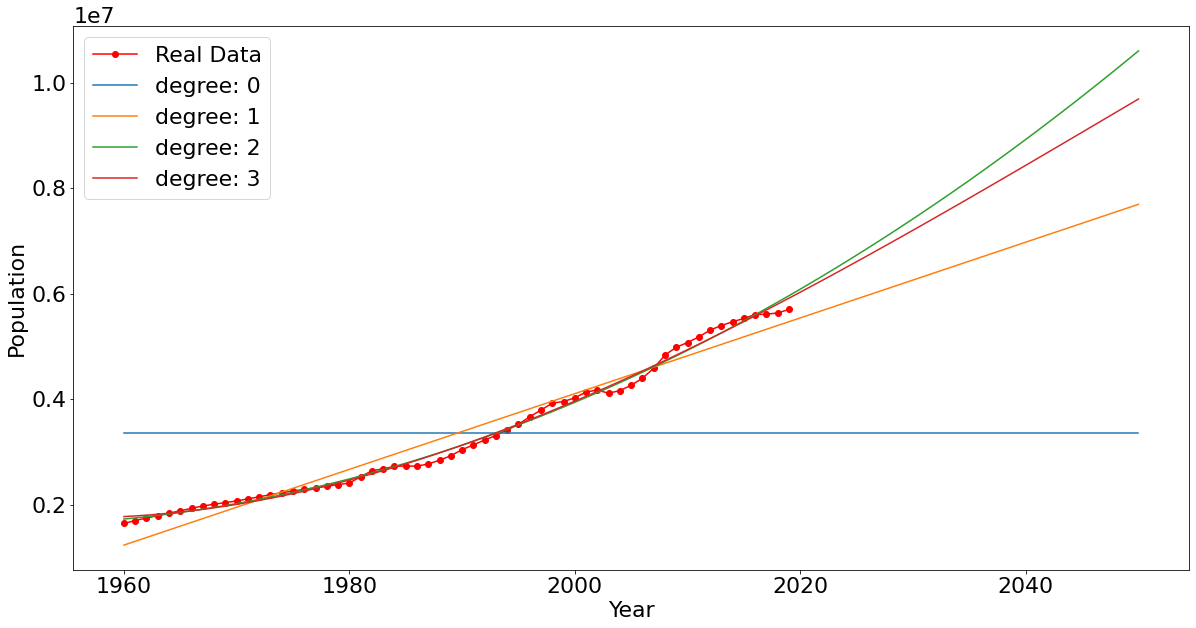

In [22]:
polyreg2 = {}
pred2 = {}
x_years = np.array(range(1960, 2051))
x_years = x_years.reshape(-1,1)

plt.figure(figsize = (20,10))
plt.plot(x,y, '-or', label = "Real Data")
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()

for i in range(4):
    degree = i
    polyreg2[i]=make_pipeline(PolynomialFeatures(degree),LinearRegression())
    polyreg2[i].fit(x,y)
    pred2[i] = polyreg2[i].predict(x_years)
    
    plt.plot(x_years, pred2[i], label = "degree: "+ str(i))
    plt.legend()
    
    print("Score: ", polyreg2[i].score(x,y))


In [23]:
# Degree 3 polynomial seems to be the best model for future predictions
# This decision was based on intuition as performance on a test set (sampled from years 1960 to 2020) is not a good metric for future predictions (years 2021 to 2050)

In [24]:

pred_population = polyreg2[3].predict(x_future)

In [25]:
future_pred = {}
future_pred['year'] = np.array(range(2020,2051))
future_pred['Land Area'] = pred_land_area
future_pred['Population'] = pred_population

In [26]:
future_pred

{'year': array([2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030,
        2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041,
        2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050]),
 'Land Area': array([729.85628295, 732.68647845, 735.51667396, 738.34686947,
        741.17706498, 744.00726048, 746.83745599, 749.6676515 ,
        752.49784701, 755.32804251, 758.15823802, 760.98843353,
        763.81862904, 766.64882454, 769.47902005, 772.30921556,
        775.13941107, 777.96960657, 780.79980208, 783.62999759,
        786.4601931 , 789.2903886 , 792.12058411, 794.95077962,
        797.78097513, 800.61117063, 803.44136614, 806.27156165,
        809.10175716, 811.93195266, 814.76214817]),
 'Population': array([6031372.7883606 , 6145470.95243835, 6260386.61705017,
        6376090.79928589, 6492554.51612091, 6609748.78462982,
        6727644.62181091, 6846213.04472351, 6965425.07037354,
        7085251.71580505, 7205663.99806213, 7326632.93413544,
     

In [27]:
SG_future = pd.DataFrame(future_pred)

In [28]:
SG_future.head()

,year,Land Area,Population
0,2020,729.856283,6.031373e+06
1,2021,732.686478,6.145471e+06
2,2022,735.516674,6.260387e+06
3,2023,738.346869,6.376091e+06
4,2024,741.177065,6.492555e+06


Text(0, 0.5, 'Estimated Population (in Million)')

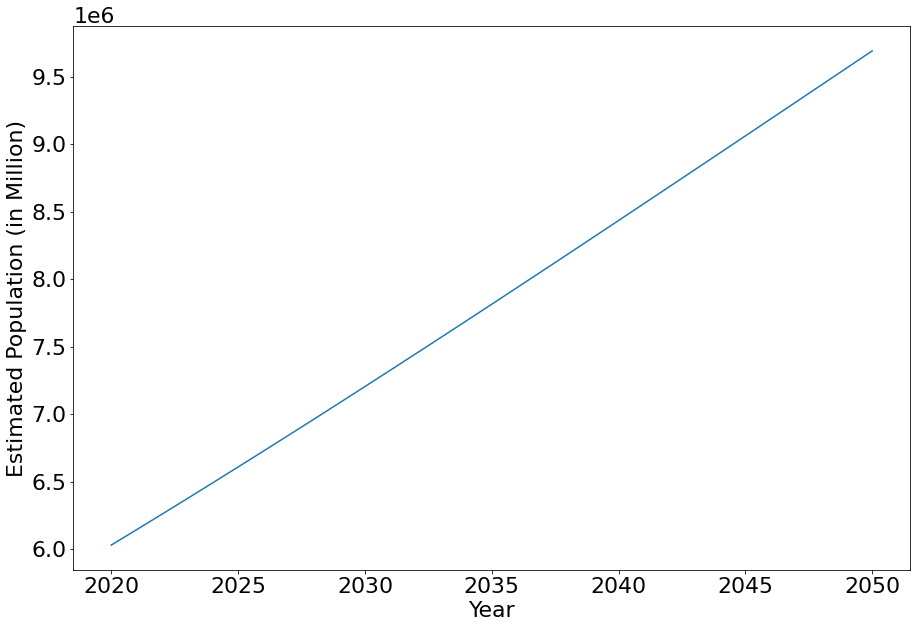

In [29]:
plt.figure(figsize = (15,10))
plt.plot(SG_future['year'], SG_future['Population'])
plt.xlabel('Year')
plt.ylabel('Estimated Population (in Million)')

Text(0, 0.5, 'Estimated Land area (in square km)')

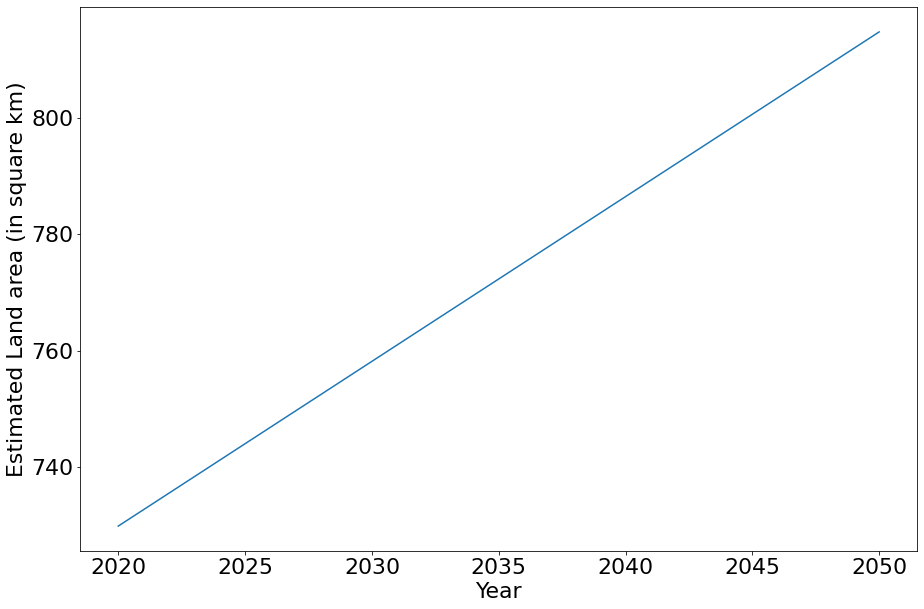

In [30]:
plt.figure(figsize = (15,10))
plt.plot(SG_future['year'], SG_future['Land Area'])
plt.xlabel('Year')
plt.ylabel('Estimated Land area (in square km)')

In [31]:
SG_future['Population Density'] = SG_future['Population']/SG_future['Land Area']

In [32]:
SG_future

,year,Land Area,Population,Population Density
0,2020,729.856283,6.031373e+06,8263.781417
1,2021,732.686478,6.145471e+06,8387.586141
2,2022,735.516674,6.260387e+06,8511.549552
3,2023,738.346869,6.376091e+06,8635.630573
4,2024,741.177065,6.492555e+06,8759.788751
5,2025,744.007260,6.609749e+06,8883.984251
6,2026,746.837456,6.727645e+06,9008.177841
7,2027,749.667651,6.846213e+06,9132.330882
8,2028,752.497847,6.965425e+06,9256.405315
9,2029,755.328043,7.085252e+06,9380.363653


#### Estimated population density of SG

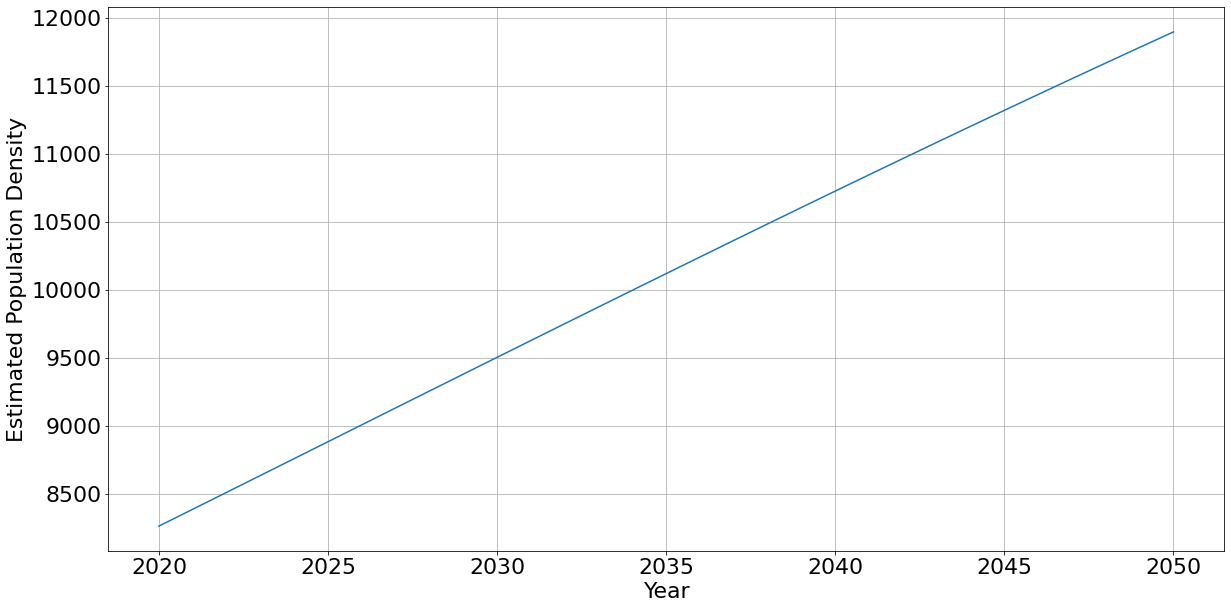

In [33]:
plt.figure(figsize = (20,10))
plt.plot(SG_future['year'], SG_future['Population Density'])
plt.xlabel('Year')
plt.ylabel('Estimated Population Density')
plt.grid()

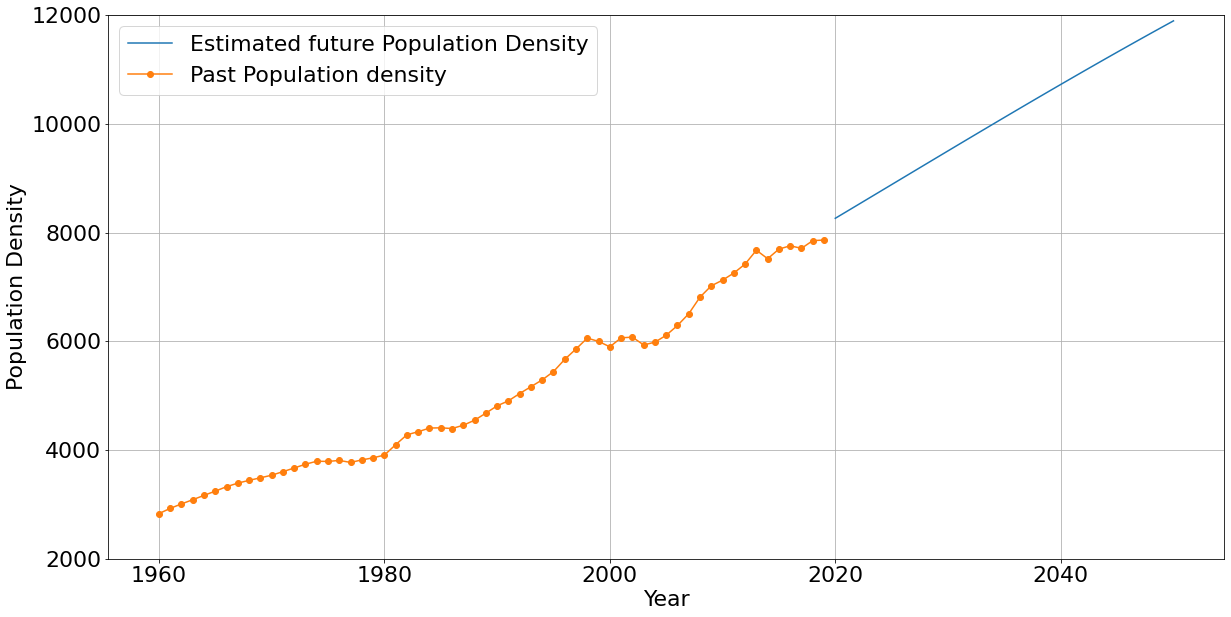

In [35]:
plt.figure(figsize=(20,10))
plt.plot(SG_future['year'], SG_future['Population Density'], label="Estimated future Population Density")
plt.plot(SG_past['year'], SG_past['Population Density'], '-o', label = "Past Population density")
plt.ylim(2000, 12000)
plt.xlabel("Year")
plt.ylabel("Population Density")
plt.legend()
plt.grid()